# Research Questions
What countries had the highest/lowest vaccination rates?
Covid cases vs vaccinations?

In [88]:
import pandas as pd
from pathlib import Path
import numpy as np

In [89]:
age_group = Path("../Resources/vaccinations-by-age-group.csv")
manufacturer = Path("../Resources/vaccinations-by-manufacturer.csv")

In [90]:
age_group_df = pd.read_csv(age_group)
manufacturer_df = pd.read_csv(manufacturer)
print(age_group_df["location"].nunique())
print(manufacturer_df["location"].nunique())

38
44


In [91]:
age_group_df

,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,2020-01-01,100+,0.00,0.00,0.0
1,Argentina,2020-01-01,12-17,0.00,0.00,0.0
2,Argentina,2020-01-01,18-29,0.00,0.00,0.0
3,Argentina,2020-01-01,3-11,0.00,0.00,0.0
4,Argentina,2020-01-01,30-39,0.00,0.00,0.0
...,...,...,...,...,...,...
72535,Uruguay,2021-07-09,35-44,81.24,73.55,NaN
72536,Uruguay,2021-07-09,45-54,84.00,78.39,NaN
72537,Uruguay,2021-07-09,55-64,88.66,84.06,NaN
72538,Uruguay,2021-07-09,65-74,89.78,78.87,NaN


In [92]:
age_group_df = age_group_df.groupby(['location','age_group']).max(['people_vaccinated_per_hundred'])
age_group_df.head(20)

people_vaccinated_per_hundred  \
location  age_group                                  
Argentina 100+                              113.85   
          12-17                              92.05   
          18-29                              98.03   
          3-11                               84.76   
          30-39                             100.02   
          40-49                              99.45   
          50-59                              97.10   
          60-69                              99.71   
          70-79                              97.90   
          80-89                              93.22   
          90-99                              83.02   
Australia 12-15                              84.97   
          16-19                              93.77   
          20-29                              90.54   
          30-39                              96.56   
          40-49                              96.96   
          5-11                               46.40   
          50-59                              98.49   
          60-69                             101.56   
          70-79                             107.31   

                     people_fully_vaccinated_per_hundred  \
location  age_group                                        
Argentina 100+                                     92.01   
          12-17                                    65.22   
          18-29                                    83.78   
          3-11                                     68.01   
          30-39                                    90.03   
          40-49                                    90.64   
          50-59                                    79.87   
          60-69                                    77.02   
          70-79                                    83.98   
          80-89                                    86.48   
          90-99                                    76.66   
Australia 12-15                                    80.45   
          16-19                                    91.85   
          20-29                                    88.20   
          30-39                                    94.57   
          40-49                                    95.77   
          5-11                                      0.28   
          50-59                                    97.43   
          60-69                                   100.45   
          70-79                                   106.16   

                     people_with_booster_per_hundred  
location  age_group                                   
Argentina 100+                                129.01  
          12-17                                44.05  
          18-29                                56.13  
          3-11                                 15.06  
          30-39                                78.05  
          40-49                               100.17  
          50-59                               117.12  
          60-69                               145.27  
          70-79                               162.90  
          80-89                               141.16  
          90-99                               117.33  
Australia 12-15                                  NaN  
          16-19                                  NaN  
          20-29                                  NaN  
          30-39                                  NaN  
          40-49                                  NaN  
          5-11                                   NaN  
          50-59                                  NaN  
          60-69                                  NaN  
          70-79                                  NaN

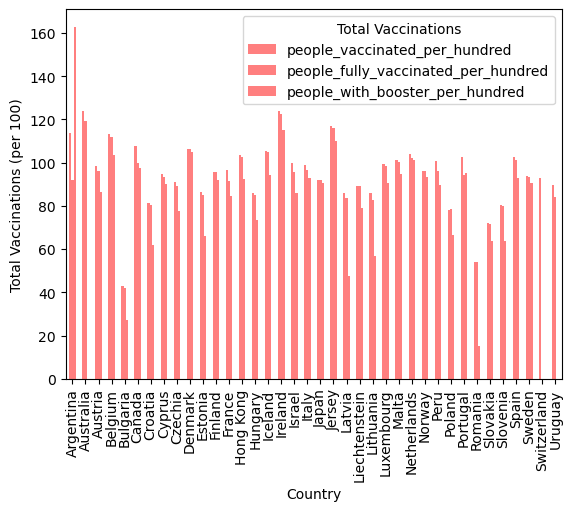

In [93]:
vax_age_chart = total_vax_age.plot(kind='bar', color='red', alpha=0.5)
vax_age_chart.set_xlabel('Country')
vax_age_chart.set_ylabel('Total Vaccinations (per 100)')
vax_age_chart.legend(title = 'Total Vaccinations')

# Manufacturer Data

In [94]:
manufacturer_df

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20493
3,Argentina,2020-12-30,Sputnik V,40595
4,Argentina,2020-12-31,Sputnik V,43401
...,...,...,...,...
67939,European Union,2024-05-03,Sanofi/GSK,5458
67940,European Union,2024-05-03,Sinopharm/Beijing,2320667
67941,European Union,2024-05-03,Sinovac,10664
67942,European Union,2024-05-03,Sputnik V,1845408


In [95]:
manufacturer_df = manufacturer_df.groupby(['location','vaccine']).sum('total_vaccinations')
manufacturer_df.head(50)

total_vaccinations
location  vaccine                               
Argentina CanSino                      291185458
          Moderna                    11087107891
          Oxford/AstraZeneca         12970855170
          Pfizer/BioNTech            14233097997
          Sinopharm/Beijing          20839350663
          Sputnik Light                  2992290
          Sputnik V                  11320592145
Austria   Johnson&Johnson               31187339
          Moderna                      163186061
          Novavax                         881547
          Oxford/AstraZeneca           148814463
          Pfizer/BioNTech             1516474588
          Sanofi/GSK                        5690
          Valneva                          77000
Belgium   Johnson&Johnson               39414527
          Moderna                      359018553
          Novavax                         111454
          Oxford/AstraZeneca           179896620
          Pfizer/BioNTech             2139368429
Bulgaria  Johnson&Johnson               49916981
          Moderna                       45978124
          Oxford/AstraZeneca            18735397
          Pfizer/BioNTech              322798311
Canada    Johnson&Johnson                 525703
          Medicago                          2246
          Moderna                      978738364
          Novavax                         171656
          Oxford/AstraZeneca           143618608
          Pfizer/BioNTech             2599371929
Chile     CanSino                              0
          Moderna                              0
          Oxford/AstraZeneca           154811664
          Pfizer/BioNTech             3477266625
          Sinovac                    11550207016
Croatia   Johnson&Johnson               20537713
          Moderna                       51701566
          Novavax                          31443
          Oxford/AstraZeneca            45754732
          Pfizer/BioNTech              451365562
Cyprus    Johnson&Johnson                2649277
          Moderna                       12513793
          Novavax                          10064
          Oxford/AstraZeneca            10381247
          Pfizer/BioNTech              125573083
Czechia   Covaxin                             55
          Johnson&Johnson              210091590
          Moderna                     1107677059
          Novavax                        3038146
          Oxford/AstraZeneca           256393039
          Pfizer/BioNTech            14174146411

In [96]:
total_vax = manufacturer_df.groupby(['location']).sum(['total_vaccinations'])
total_vax = total_vax.drop(total_vax.loc(total_vax['location' == 'European Union']))
print(total_vax)
total_vax['total_vaccinations'].describe()

KeyError: False

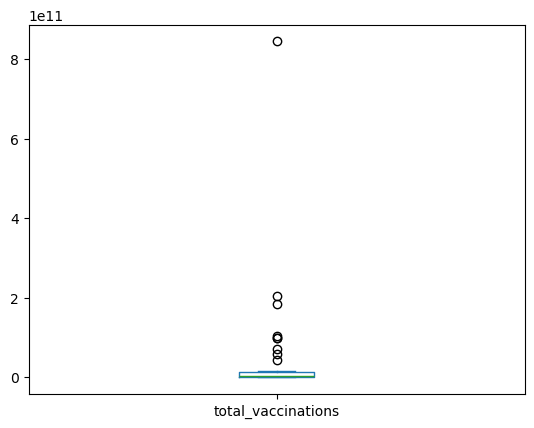

In [81]:
stat_chart_total_vax = total_vax.plot(kind='box')

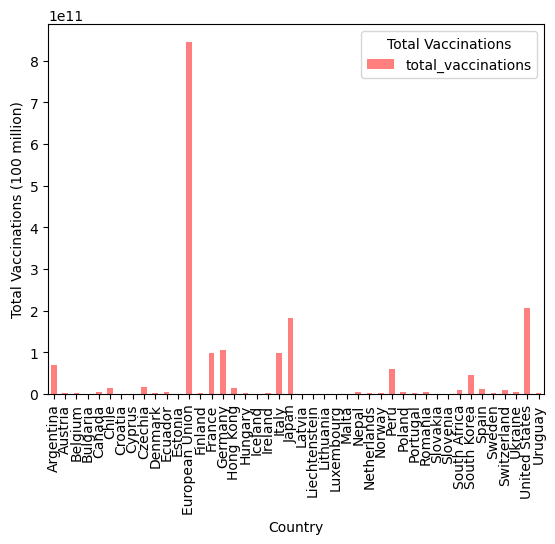

In [40]:
count_chart = total_vax.plot(kind='bar', color='red', alpha=0.5)
count_chart.set_xlabel('Country')
count_chart.set_ylabel('Total Vaccinations (100 million) from Dec 29, 2020 to Jan 27, 2024')
count_chart.legend(title = 'Total Vaccinations')